# APPLICATION FOR ADMISSION IN NURSERY SCHOOL SYSTEM

---


Here's the reference for the dataset : [Nursery Dataset](https://archive.ics.uci.edu/ml/datasets/nursery)
***

### Understanding the dataset
This is a classification problem. Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. The dataset contains information about occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family.

The hierarchical model ranks nursery-school applications according to the following concept structure:

       NURSERY            Evaluation of applications for nursery schools
       . EMPLOY           Employment of parents and child's nursery
       . . parents        Parents' occupation
       . . has_nurs       Child's nursery
       . STRUCT_FINAN     Family structure and financial standings
       . . STRUCTURE      Family structure
       . . . form         Form of the family
       . . . children     Number of children
       . . housing        Housing conditions
       . . finance        Financial standing of the family
       . SOC_HEALTH       Social and health picture of the family
       . . social         Social conditions
       . . health         Health conditions
       
Total Number of Instances: 12960

Total Number of Attributes: 8

Attribute Values:

       parents        usual, pretentious, great_pret
       has_nurs       proper, less_proper, improper, critical, very_crit
       form           complete, completed, incomplete, foster
       children       1, 2, 3, more
       housing        convenient, less_conv, critical
       finance        convenient, inconv
       social         non-prob, slightly_prob, problematic
       health         recommended, priority, not_recom

We need to train the model and given a new data we need to classify whether the child is: 

        not_recommended
        recommended
        very_recommended
        priority
        spec_priority


### Problem Statement: 
This is a classification problem. The dataset contains information about occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family. We need to train the model and given a new dataset we need to classify whether the child is "not_recommended, recommended, very_recommended, priority and spec_priority". It solves the problem of figuring out what prerequisites are needed for a child's application to be accepted by the Nursery school. The advantage of using my trained model will help parents realize what are the problems that must avoided when applying for a Nursery school.

Alright let's start.

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

### Reading Dataset from the CSV File and assigning column names

In [2]:
d = pd.read_csv('nursery_data.csv', names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
d

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


### Checking for any missing data in the dataset

In [3]:
print(d.isnull().any())

parents     False
has_nurs    False
form        False
children    False
housing     False
finance     False
social      False
health      False
class       False
dtype: bool


From above, we get to know that there are no missing values in the dataset. So we can now proceed with preparing the dataset.

### Challenges with preparing the data for training
Here is how the dataset looks.

The entire dataset is in the form of strings. Also the dataset is completely classified. The challenge with the data is we need to convert the dataset which is in the form of strings into a format where we can feed it into a model. 

In [4]:
d.head(5) #prints first five instances of the dataset

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


### Deriving insights from the dataset
This is a classificcation problem. We need to classify whether a child belongs to any of the classes as mentioned in the dataset.

#### Visualization of Taarget(class) attribute
We are using count plot in order to get to know how data is spread into different categories of class(How many values of each category are present).

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64


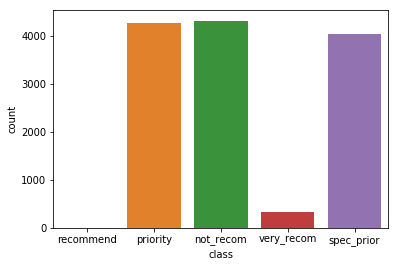

In [5]:
print(d['class'].value_counts())
sns.countplot(x='class', data=d)
plt.show()

|                  Category                                | Count |
|----------------------------------------------------------|-------|
|Children who are recommended to join Nursery              |    2  |
|Children who are not recommended to join Nursery          | 4320  |
|Children who are very recommended to join Nursery         |  328  |
|Children who are prioritized to join Nursery              | 4266  |
|Children who are specifically prioritized to join Nursery | 4044  |

The above graph shows how many instances of data have been spreaded into different categories. Though the datasetmay be biased towards priority, not recommended and specific priority, we can proceed with this dataset.

### Finding the correlation of all features with Class by using Spearman Correlation

Correlation is one of the most widely used statistical concepts. The term "correlation" refers to a mutual relationship or association between quantities. In almost any business, it is useful to express one quantity in terms of its relationship with others.

#### Spearman Correlation

In Spearman rank correlation instead of working with the data values themselves (as discussed in Correlation coefficient), it work with the ranks of these values.
The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables. Here we will use Spearman Correlation to find how data is related.

In [7]:
a=[]
a=d.apply(lambda col: col.corr(d['class'], method='spearman'), axis=0)

a=a.abs().sort_values(ascending=False)
a

class       1.000000
health      0.725217
parents     0.106873
children    0.023279
housing     0.018425
finance     0.015044
form        0.013994
has_nurs    0.006445
social      0.000000
dtype: float64

### Zipping relevant features with Class

We are zipping all the features with the target(class) to get the number of unique values contained in the dataset. It shows how  each feature is related to the target. This is done for better visualization of the data.

The data nad the values displayed by using split is utilized in data visualization part which comes in the next section.

In [8]:
z=[]
z=list(zip(d['parents'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(great_pret, spec_prior)     2022
(usual, priority)            1924
(pretentious, priority)      1484
(great_pret, not_recom)      1440
(usual, not_recom)           1440
(pretentious, not_recom)     1440
(pretentious, spec_prior)    1264
(great_pret, priority)        858
(usual, spec_prior)           758
(usual, very_recom)           196
(pretentious, very_recom)     132
(usual, recommend)              2
Name: 0, dtype: int64

In [9]:
z=[]
z=list(zip(d['has_nurs'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(very_crit, spec_prior)      1518
(less_proper, priority)      1344
(proper, priority)           1344
(critical, spec_prior)       1264
(improper, priority)          904
(proper, not_recom)           864
(critical, not_recom)         864
(improper, not_recom)         864
(very_crit, not_recom)        864
(less_proper, not_recom)      864
(improper, spec_prior)        758
(critical, priority)          464
(proper, spec_prior)          252
(less_proper, spec_prior)     252
(very_crit, priority)         210
(less_proper, very_recom)     132
(proper, very_recom)          130
(improper, very_recom)         66
(proper, recommend)             2
Name: 0, dtype: int64

In [10]:
z=[]
z=list(zip(d['form'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(complete, priority)        1152
(foster, spec_prior)        1136
(completed, priority)       1092
(incomplete, not_recom)     1080
(completed, not_recom)      1080
(complete, not_recom)       1080
(foster, not_recom)         1080
(incomplete, spec_prior)    1052
(incomplete, priority)      1038
(foster, priority)           984
(completed, spec_prior)      968
(complete, spec_prior)       888
(complete, very_recom)       118
(completed, very_recom)      100
(incomplete, very_recom)      70
(foster, very_recom)          40
(complete, recommend)          2
Name: 0, dtype: int64

In [11]:
z=[]
z=list(zip(d['children'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(1, priority)         1206
(3, spec_prior)       1136
(more, spec_prior)    1136
(2, priority)         1092
(1, not_recom)        1080
(2, not_recom)        1080
(more, not_recom)     1080
(3, not_recom)        1080
(more, priority)       984
(3, priority)          984
(2, spec_prior)        968
(1, spec_prior)        804
(1, very_recom)        148
(2, very_recom)        100
(3, very_recom)         40
(more, very_recom)      40
(1, recommend)           2
Name: 0, dtype: int64

In [12]:
z=[]
z=list(zip(d['housing'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(convenient, priority)      1618
(critical, spec_prior)      1608
(critical, not_recom)       1440
(convenient, not_recom)     1440
(less_conv, not_recom)      1440
(less_conv, priority)       1396
(less_conv, spec_prior)     1384
(critical, priority)        1252
(convenient, spec_prior)    1052
(convenient, very_recom)     208
(less_conv, very_recom)      100
(critical, very_recom)        20
(convenient, recommend)        2
Name: 0, dtype: int64

In [13]:
z=[]
z=list(zip(d['finance'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(convenient, priority)      2244
(inconv, spec_prior)        2188
(convenient, not_recom)     2160
(inconv, not_recom)         2160
(inconv, priority)          2022
(convenient, spec_prior)    1856
(convenient, very_recom)     218
(inconv, very_recom)         110
(convenient, recommend)        2
Name: 0, dtype: int64

In [14]:
z=[]
z=list(zip(d['social'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(problematic, spec_prior)      1644
(nonprob, priority)            1515
(slightly_prob, priority)      1515
(nonprob, not_recom)           1440
(problematic, not_recom)       1440
(slightly_prob, not_recom)     1440
(problematic, priority)        1236
(nonprob, spec_prior)          1200
(slightly_prob, spec_prior)    1200
(slightly_prob, very_recom)     164
(nonprob, very_recom)           164
(slightly_prob, recommend)        1
(nonprob, recommend)              1
Name: 0, dtype: int64

In [15]:
z=[]
z=list(zip(d['health'],d['class']))
z = pd.DataFrame([z])
z=z.T
z=z[0].value_counts()
z

(not_recom, not_recom)       4320
(priority, spec_prior)       2466
(recommended, priority)      2412
(priority, priority)         1854
(recommended, spec_prior)    1578
(recommended, very_recom)     328
(recommended, recommend)        2
Name: 0, dtype: int64

### Visualizing Zipped Data¶
Here, we use all the values obtained by zipped data from the previous version in order to plot the graph. We are going to plot each feature(attribute) with respect to target(class) in order to see how each data is related with the target.

#### Parents and Class

Text(0.5, 1.0, 'Does Specific type of Parents impact Class?')

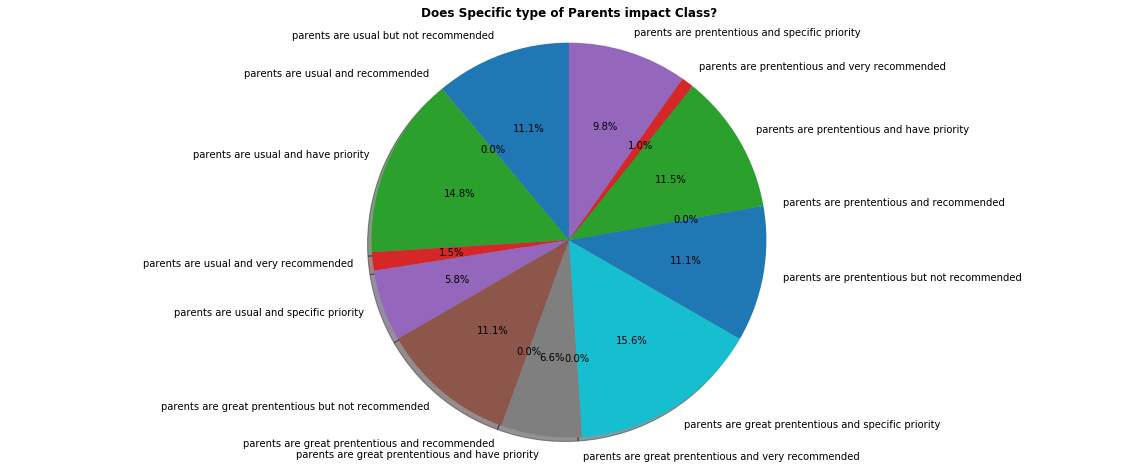

In [16]:
labels1 = 'parents are usual but not recommended','parents are usual and recommended','parents are usual and have priority','parents are usual and very recommended','parents are usual and specific priority','parents are great prententious but not recommended','parents are great prententious and recommended','parents are great prententious and have priority','parents are great prententious and very recommended','parents are great prententious and specific priority','parents are prententious but not recommended','parents are prententious and recommended','parents are prententious and have priority','parents are prententious and very recommended','parents are prententious and specific priority'
sizes1 = [1440,2,1924,196,758,1440,0,858,0,2022,1440,0,1484,132,1264]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.title("Does Specific type of Parents impact Class?",fontweight='bold')

#### Nursery and Class

Text(0.5, 1.0, 'Does Specific type of Nursery impact Class?')

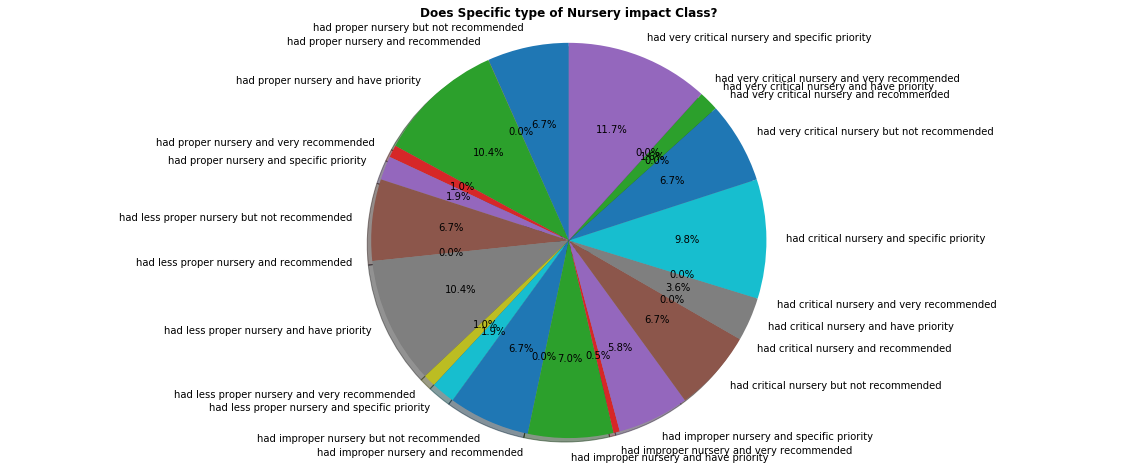

In [17]:
labels1 = ['had proper nursery but not recommended','had proper nursery and recommended','had proper nursery and have priority','had proper nursery and very recommended','had proper nursery and specific priority','had less proper nursery but not recommended','had less proper nursery and recommended','had less proper nursery and have priority','had less proper nursery and very recommended','had less proper nursery and specific priority','had improper nursery but not recommended','had improper nursery and recommended','had improper nursery and have priority','had improper nursery and very recommended','had improper nursery and specific priority','had critical nursery but not recommended','had critical nursery and recommended','had critical nursery and have priority','had critical nursery and very recommended','had critical nursery and specific priority','had very critical nursery but not recommended','had very critical nursery and recommended','had very critical nursery and have priority','had very critical nursery and very recommended','had very critical nursery and specific priority']
sizes1 = [864,2,1344,130,252,864,0,1344,132,252,864,0,904,66,758,864,0,464,0,1264,864,0,210,0,1518]
#sizes1 = [a,b,c,d,e,a,b,c,d,e,a,b,c,d,e,a,b,c,d,e]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Specific type of Nursery impact Class?",fontweight='bold')

#### Form and Class

Text(0.5, 1.0, 'Does Specific type of Form impact Class?')

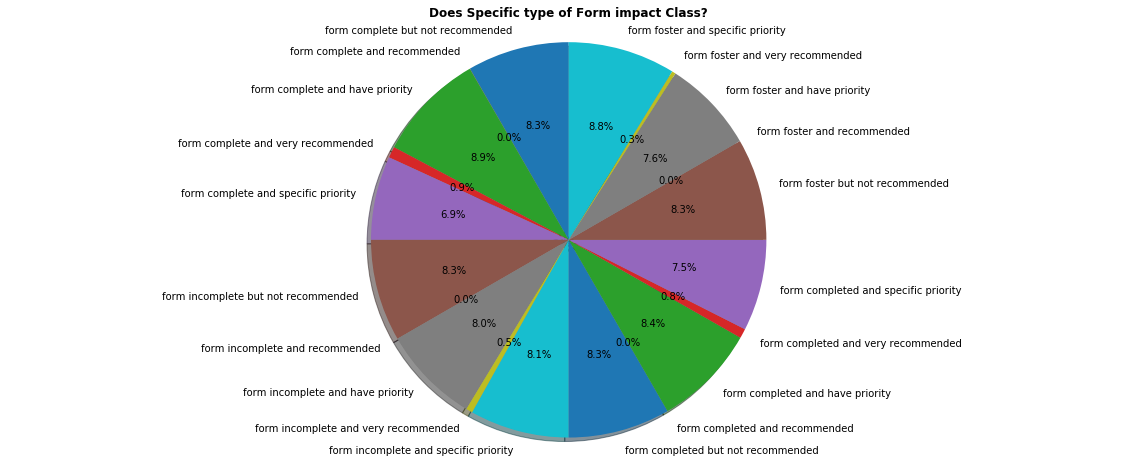

In [18]:
labels1 = ['form complete but not recommended','form complete and recommended','form complete and have priority','form complete and very recommended','form complete and specific priority','form incomplete but not recommended','form incomplete and recommended','form incomplete and have priority','form incomplete and very recommended','form incomplete and specific priority','form completed but not recommended','form completed and recommended','form completed and have priority','form completed and very recommended','form completed and specific priority','form foster but not recommended','form foster and recommended','form foster and have priority','form foster and very recommended','form foster and specific priority']
sizes1 = [1080,2,1152,118,888,1080,0,1038,70,1052,1080,0,1092,100,968,1080,0,984,40,1136]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Specific type of Form impact Class?",fontweight='bold')

#### Children and Class

Text(0.5, 1.0, 'Does Specific number of Children impact Class?')

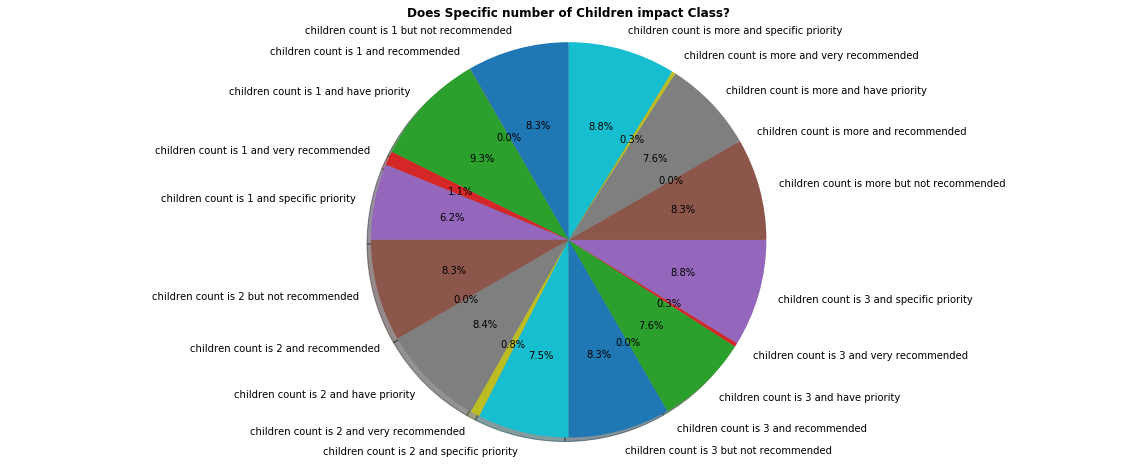

In [19]:
labels1 = ['children count is 1 but not recommended','children count is 1 and recommended','children count is 1 and have priority','children count is 1 and very recommended','children count is 1 and specific priority','children count is 2 but not recommended','children count is 2 and recommended','children count is 2 and have priority','children count is 2 and very recommended','children count is 2 and specific priority','children count is 3 but not recommended','children count is 3 and recommended','children count is 3 and have priority','children count is 3 and very recommended','children count is 3 and specific priority','children count is more but not recommended','children count is more and recommended','children count is more and have priority','children count is more and very recommended','children count is more and specific priority']
sizes1 = [1080,2,1206,148,804,1080,0,1092,100,968,1080,0,984,40,1136,1080,0,984,40,1136]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Specific number of Children impact Class?",fontweight='bold')

#### Housing and Class

Text(0.5, 1.0, 'Does Specific type of Housing impact Class?')

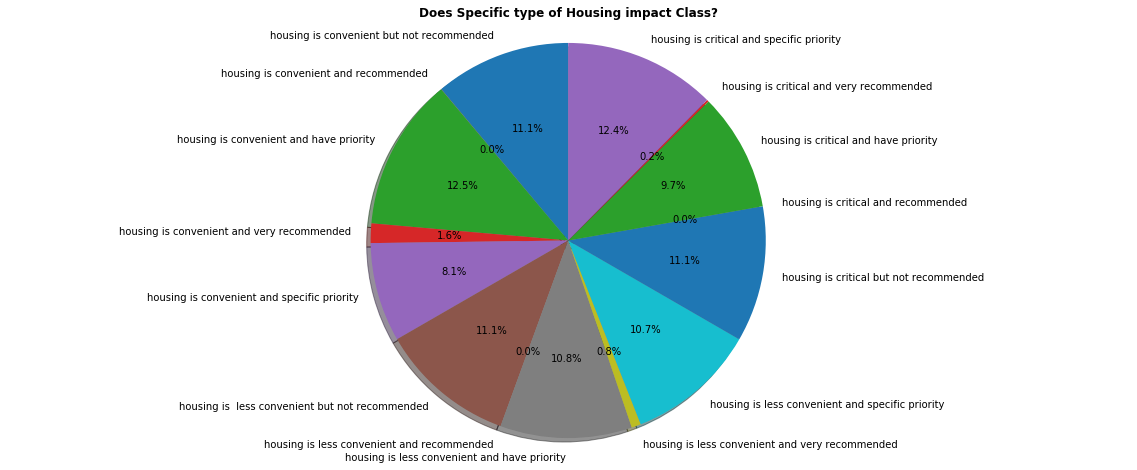

In [20]:
labels1 = ['housing is convenient but not recommended','housing is convenient and recommended','housing is convenient and have priority','housing is convenient and very recommended','housing is convenient and specific priority','housing is  less convenient but not recommended','housing is less convenient and recommended','housing is less convenient and have priority','housing is less convenient and very recommended','housing is less convenient and specific priority','housing is critical but not recommended','housing is critical and recommended','housing is critical and have priority','housing is critical and very recommended','housing is critical and specific priority'] 
sizes1 = [1440,2,1618,207,1052,1440,0,1396,100,1384,1440,0,1252,20,1608]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Specific type of Housing impact Class?" ,fontweight='bold')

#### Finance and Class

Text(0.5, 1.0, 'Does Specific Finance impact Class?')

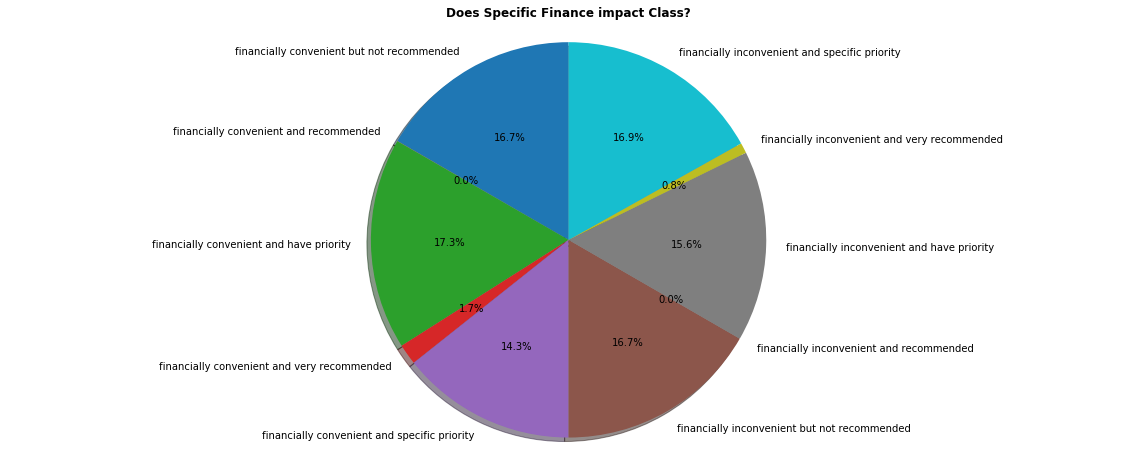

In [21]:
labels1 = ['financially convenient but not recommended','financially convenient and recommended','financially convenient and have priority','financially convenient and very recommended','financially convenient and specific priority','financially inconvenient but not recommended','financially inconvenient and recommended','financially inconvenient and have priority','financially inconvenient and very recommended','financially inconvenient and specific priority'] 
sizes1 = [2160,2,2244,218,1856,2160,0,2022,110,2188]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Specific Finance impact Class?",fontweight='bold')

#### Social and Class

Text(0.5, 1.0, 'Does Social problems impact Class?')

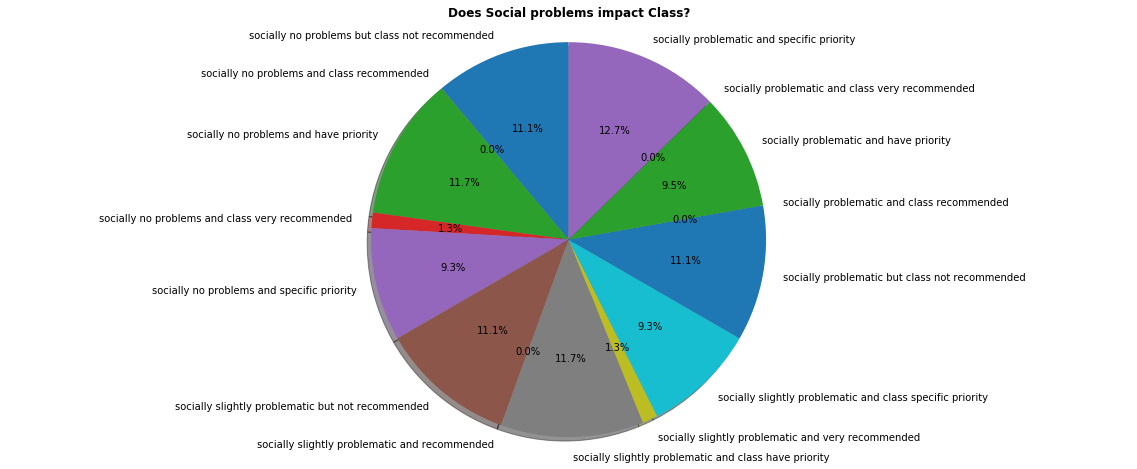

In [22]:
labels1 = ['socially no problems but class not recommended','socially no problems and class recommended','socially no problems and have priority','socially no problems and class very recommended','socially no problems and specific priority','socially slightly problematic but not recommended','socially slightly problematic and recommended','socially slightly problematic and class have priority','socially slightly problematic and very recommended','socially slightly problematic and class specific priority','socially problematic but class not recommended','socially problematic and class recommended','socially problematic and have priority','socially problematic and class very recommended','socially problematic and specific priority']
sizes1 = [1440,1,1515,164,1200,1440,1,1515,164,1200,1440,0,1236,0,1644]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Social problems impact Class?",fontweight='bold')

#### Health and Class

Text(0.5, 1.0, 'Does Health impact Class?')

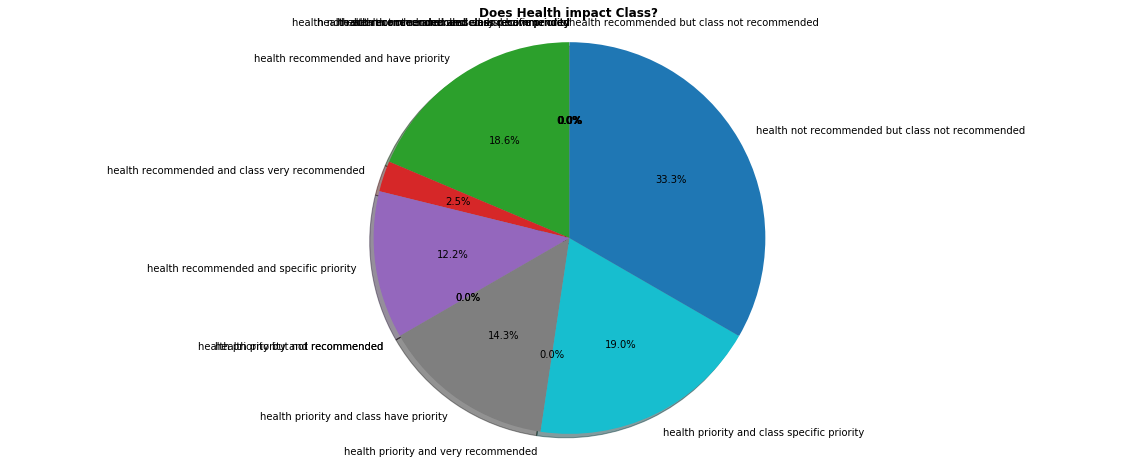

In [23]:
labels1 = ['health recommended but class not recommended','health recommended and class recommended','health recommended and have priority','health recommended and class very recommended','health recommended and specific priority','health priority but not recommended','health priority and recommended','health priority and class have priority','health priority and very recommended','health priority and class specific priority','health not recommended but class not recommended','health not recommended and class recommended','health not recommended and have priority','health not recommended and class very recommended','health not recommended and specific priority']
sizes1 = [0,2,2412,328,1578,0,0,1854,0,2466,4320,0,0,0,0]

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Does Health impact Class?",fontweight='bold')

From all the different plots as shown above, we can see that most of the features are dispersed and hence they are contributing to the dataset. But, "finance" feature has almost all equal sectors in the graph. Since its not dispersed, it is not contributing much to the target and so we can drop that feature.

### Feature Selection - Dropping unwanted featues from the dataset

From the above plots, we got to know what all features are contributing to the target feature. Hence we are dropping finance feature which is not contributing much to the dataset.

In [24]:
feat = ['finance']
d = d.drop(feat, axis = 1)
d.head(5)

,parents,has_nurs,form,children,housing,social,health,class
0,usual,proper,complete,1,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,slightly_prob,priority,priority


### Preprocessing the data for the model
In order to do any training with the dataset, we need to first preprocess the data.
Data preprocessing plays a major role before applying any algorithm. So we need to convert the dataset which is in the form of strings to numbers.

Now, since the entire dataset is classifed and in the form of strings, we need to manually convert the strings to numbers. 
We are converting the strings to numbers or binary codes in two ways : by using categorical codes and by using dummy values which is done as follows:

**Categorical:**
```python
data[features].astype("category").cat.codes
```

**Binary values using get_dummies**
```python
pd.get_dummies(data[features])
```

In [25]:
#Categorical
features = ["children","housing","class","has_nurs","social"]
for column in features:
    d[column] = d[column].astype("category").cat.codes
d.head(5)

,parents,has_nurs,form,children,housing,social,health,class
0,usual,3,complete,0,0,0,recommended,2
1,usual,3,complete,0,0,0,priority,1
2,usual,3,complete,0,0,0,not_recom,0
3,usual,3,complete,0,0,2,recommended,2
4,usual,3,complete,0,0,2,priority,1


In [26]:
features1 = ['parents','form','health']
x1 = d.drop(features1, axis = 1)
x1.head(5)

,has_nurs,children,housing,social,class
0,3,0,0,0,2
1,3,0,0,0,1
2,3,0,0,0,0
3,3,0,0,2,2
4,3,0,0,2,1


In [27]:
# Get Dummies
x2 = d.drop(features, axis = 1)

x2 = pd.get_dummies(x2)
x2.head(5)

,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended
0,0,0,1,1,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0
2,0,0,1,1,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,1,0


In [28]:
#Concatinating into a dataframe
x = pd.concat([x1, x2], axis = 1)
x.head(5)

,has_nurs,children,housing,social,class,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended
0,3,0,0,0,2,0,0,1,1,0,0,0,0,0,1
1,3,0,0,0,1,0,0,1,1,0,0,0,0,1,0
2,3,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,3,0,0,2,2,0,0,1,1,0,0,0,0,0,1
4,3,0,0,2,1,0,0,1,1,0,0,0,0,1,0


We have divided the dataset where some features are converted into categorical values and some features into binary values. We divided them such that those features whose categories have somewhat equal proirity(as visualized above) are divided using get_dummies and the rest are divided using categorical values.

#### Pearson Correlation

Pearson is the most widely used correlation coefficient. Pearson correlation measures the linear association between
continuous variables. A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables
are linearly related.

In [29]:
a=[]
a=x.apply(lambda col: col.corr(x['class'], method='pearson'), axis=0)

a=a.abs().sort_values(ascending=False)
a

class                  1.000000e+00
health_not_recom       7.468062e-01
health_priority        4.233616e-01
health_recommended     3.234446e-01
parents_great_pret     1.289225e-01
parents_usual          1.161905e-01
children               3.119659e-02
housing                2.468133e-02
form_complete          1.879482e-02
form_foster            1.700484e-02
parents_pretentious    1.273205e-02
has_nurs               8.347501e-03
form_incomplete        6.264942e-03
form_completed         4.474958e-03
social                 5.674926e-19
dtype: float64

### Correlation matrix with Heatmap of all features

#### What is a heatmap?

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 

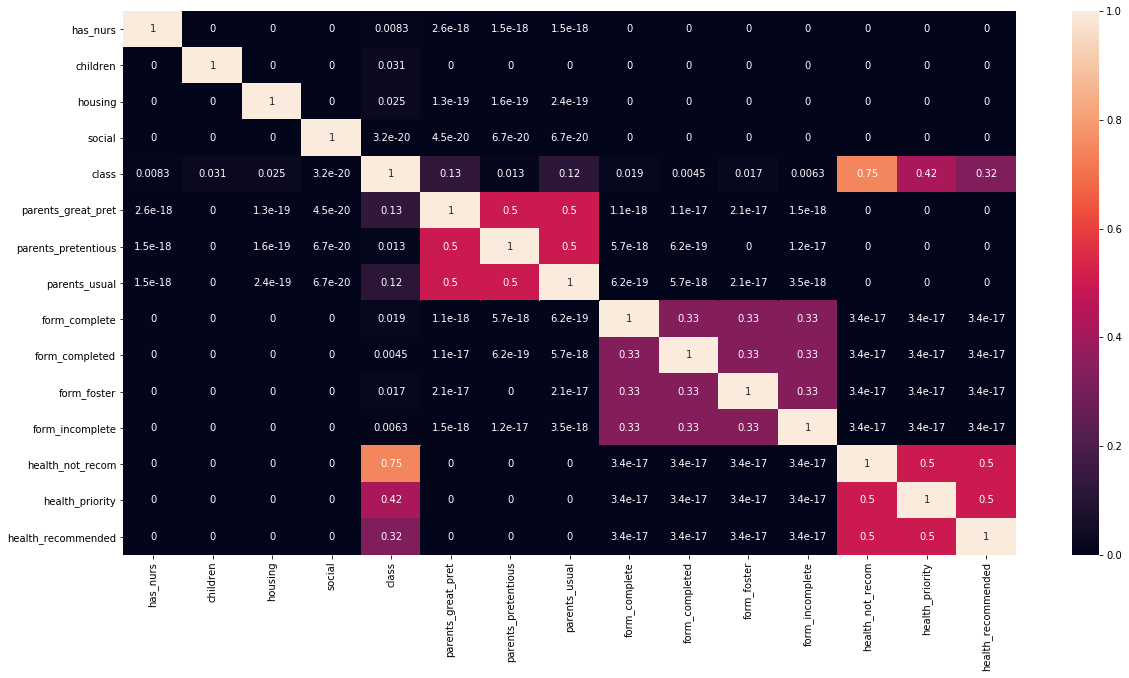

In [30]:
#Correlation between attributes
corr = abs(x.corr())
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

Now, we are dividing the dataset into two categories - X, which contains all the features except target atribute and Y, which contains the target attribute. It is done as below:

In [31]:
target = ["class"]
X = x.drop(target, axis = 1)

In [32]:
target = x[target]
Y = pd.DataFrame(target)
Y = np.array(Y)

In [33]:
X.shape

(12960, 14)

In [34]:
Y.shape

(12960, 1)

#### Principal Component Analysis(PCA)
It is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. Basically, it is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. 

Singular-Value Decomposition (SVD) is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. The singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values. 

Since we have 14 dimensions in the data, we use Principal Component Analysis(PCA) in order to do dimensionality reduction as follows:

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=8)
xtr = pca.fit_transform(X)

In [37]:
xtr.shape

(12960, 8)

Now, after data preprocessing and applying PCA, the dataset has been reduced to 8 dimensions which will be helpful to use in any model that we use.

### Picking a model based on the insights
The model that we are going to use is Artificial Neural Networks.
Our Neural Network consists of just 3 layers : Input layer, 1 Hidden layer and a Output layer.
Input layer consists of 25 nodes.  Hiddden layer consists of 13 nodes and output nodes consists of 5 nodes.
We use 2 activation functions : tanh for both input and hidden layers and softmax for the output layer.

Tensorflow is an open-source machine learning framework which helps us to do lot of tasks. We are now going to use the inbuilt Neural Networks using Tensorflow framework.

We split our dataset into training set containing 80%(10368) and test set containing the remaining 20%(2592).
We feed enitre training dataset into the Neural Network. We also do cross-valideation at each stage.

Alright, let's train our model.

### Model Selection
#### Applying Neural Network

In [38]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(xtr[0].shape), activation=tf.nn.tanh),
    keras.layers.Dense(13, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(xtr,Y, test_size=0.2)

In [48]:
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(0.000001),
             metrics=['accuracy'])

In [49]:
history = model.fit(xtrain, ytrain, epochs=20, validation_split=0.2, verbose=2)

Train on 8294 samples, validate on 2074 samples
Epoch 1/20
 - 1s - loss: 0.1444 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 2/20
 - 0s - loss: 0.1444 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 3/20
 - 0s - loss: 0.1444 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 4/20
 - 0s - loss: 0.1444 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 5/20
 - 0s - loss: 0.1444 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 6/20
 - 0s - loss: 0.1443 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 7/20
 - 0s - loss: 0.1443 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 8/20
 - 0s - loss: 0.1443 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 9/20
 - 0s - loss: 0.1443 - acc: 0.9344 - val_loss: 0.1533 - val_acc: 0.9296
Epoch 10/20
 - 0s - loss: 0.1443 - acc: 0.9344 - val_loss: 0.1532 - val_acc: 0.9296
Epoch 11/20
 - 0s - loss: 0.1443 - acc: 0.9344 - val_loss: 0.1532 - val_acc: 0.9296
Epoch 12/20
 - 0s - loss: 0.1443 - ac

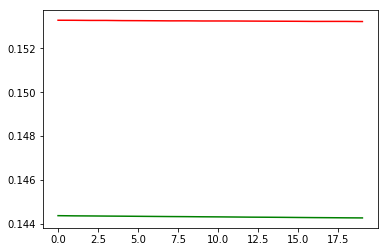

In [50]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')

In [51]:
loss, accuracy = model.evaluate(xtest,ytest)

2592/2592 [==============================] - 0s 20us/step


In [52]:
print(accuracy*100)

92.63117283950618


Using Neural networks, we got an accracy of 92.63%. ALright, let us now traing using KNN.

#### KNN Classifier

Let's create a classifier using k-Nearest Neighbors algorithm.
First let us observe the accuracies for different values of k.

In [53]:
from sklearn.neighbors import KNeighborsClassifier  

In [54]:
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(xtrain, ytrain.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(xtrain, ytrain.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(xtest, ytest.ravel()) 

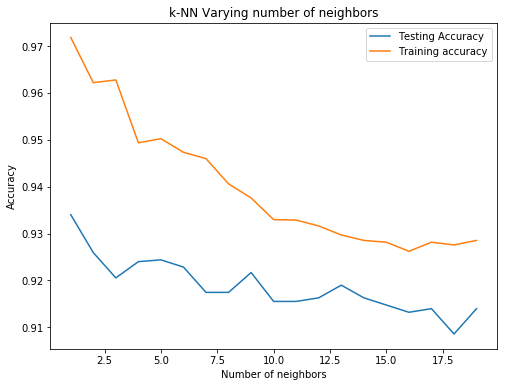

In [55]:
#Generate plot
fig = plt.figure(1, figsize=(8,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 10})
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=6. So lets create a KNeighborsClassifier with number of neighbors as 6.

In [56]:
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(xtrain, ytrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [57]:
y_pred = classifier.predict(xtest)
y_pred

array([1, 3, 0, ..., 0, 4, 0], dtype=int8)

#### Printing the Confusion Matrix and Classification Report

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.


In [58]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred))

[[842   0   0   0   0]
 [  0 787   0  50  21]
 [  0   0   0   0   1]
 [  0  94   0 732   0]
 [  0  34   0   0  31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.86      0.92      0.89       858
           2       0.00      0.00      0.00         1
           3       0.94      0.89      0.91       826
           4       0.58      0.48      0.53        65

   micro avg       0.92      0.92      0.92      2592
   macro avg       0.68      0.66      0.66      2592
weighted avg       0.92      0.92      0.92      2592



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After training the model for several times as mentioned above, the final accuracy we got is as follows:

|  Model Used    |  Accuracy  | 
|----------------|------------|
| Neural Network | 	 92.63%   |
| KNN Classifier | 	 92%      |

In [59]:
d.to_csv('nursery_processed.csv')

### Insights from the trained model and Final Conclusion based on the choosen model
We can get to know from the above accuracies that Neural networks is best suited for training this dataset. Even though the accuracy of KNN is very close to Neural networks, we go for choosing Neural networks as the best model since KNN is a stastical model.
The final accuracy tells that given a new data about a child, it will predict correctly 92% of the time to which category of class does the child belong to.